#**Kobe Bryant Shot Prediction**

# Data Import from CSV file on github

In [1]:
#import libraries 
import pandas as pd
import numpy as np

#data file downloaded from kaggle and hosted on github
data_frame = pd.read_csv('https://raw.githubusercontent.com/rmedina0531/data-science/master/kobe_data.csv')

print(data_frame.head())


         action_type combined_shot_type  ...  opponent  shot_id
0          Jump Shot          Jump Shot  ...       POR        1
1          Jump Shot          Jump Shot  ...       POR        2
2          Jump Shot          Jump Shot  ...       POR        3
3          Jump Shot          Jump Shot  ...       POR        4
4  Driving Dunk Shot               Dunk  ...       POR        5

[5 rows x 25 columns]


In [2]:
#remove all data rows that do not have a shot_made flag
#data is used after the model is train and tested to use for the kaggle competition

#drop the null values in shot_made_flag
data_frame.dropna(subset=['shot_made_flag'], inplace=True)

print(data_frame[['seconds_remaining','shot_made_flag']].head())

   seconds_remaining  shot_made_flag
1                 22             0.0
2                 45             1.0
3                 52             0.0
4                 19             1.0
5                 32             0.0


#Testing using only 2 features using KNN

###Getting comfortable manipulating and using the data set by running a simple KNN model using only 2 features

In [3]:
#pull features and labels
#for initial test purposes pulling features: seconds, shot_distance

features = data_frame[['seconds_remaining', 'shot_distance']]
labels = data_frame['shot_made_flag']

print(features.head())

   seconds_remaining  shot_distance
1                 22             15
2                 45             16
3                 52             22
4                 19              0
5                 32             14


In [4]:
#split into training and test data
from sklearn.model_selection import train_test_split


#find out what values to use for test_size and random_state
feature_train, feature_test, label_train, label_test = train_test_split(
    features, labels, test_size=0.25, random_state=6)

print(feature_train.shape)
print(label_train.shape)

(19272, 2)
(19272,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#decide on best number of neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(feature_train, label_train)
label_predict = knn.predict(feature_test)

knn_accuracy = accuracy_score(label_test, label_predict)
print(f'KNN accuracy at k=3: {knn_accuracy}')

KNN accuracy at k=3: 0.5400778210116731


#KNN using more features
##The KNN model will now use
####period
###the following must use hot encoding
action_type,
shot_zone_range,
opponent,
season,
shot_zone_area

In [6]:
#pull out the features
features = data_frame[['period']]
print(features.head())

   period
1       1
2       1
3       1
4       2
5       3


In [7]:
#one hot encoding step

#get the features to be broken down
action_type_mod = pd.get_dummies(data_frame.action_type, prefix='action_type')
shot_zone_range_mod = pd.get_dummies(data_frame.shot_zone_range, prefix='shot_zone_range')
opponent_mod = pd.get_dummies(data_frame.opponent, prefix='opponent')
shot_zone_area_mod = pd.get_dummies(data_frame.shot_zone_area, prefix='shot_zone_area')

print(type(action_type_mod))

modified_features = pd.concat([features, action_type_mod, shot_zone_range_mod, 
                              shot_zone_area_mod, opponent_mod], axis=1, sort=False)
# labels = data_frame['shot_made_flag']

print(modified_features[0::100])
# print(modified_features.shape)
# print(labels.shape)

<class 'pandas.core.frame.DataFrame'>
       period  action_type_Alley Oop Dunk Shot  ...  opponent_VAN  opponent_WAS
1           1                                0  ...             0             0
124         2                                0  ...             0             0
243         2                                0  ...             0             0
359         4                                0  ...             0             0
472         3                                0  ...             0             0
...       ...                              ...  ...           ...           ...
30093       4                                0  ...             0             0
30218       3                                0  ...             0             0
30334       2                                0  ...             0             0
30457       3                                0  ...             0             0
30579       3                                0  ...             0             0

[

In [8]:
feature_train, feature_test, label_train, label_test = train_test_split(
    modified_features, labels, test_size=0.25, random_state=6)

print(feature_train.shape)
print(label_train.shape)

(19272, 100)
(19272,)


In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(feature_train, label_train)
label_predict = knn.predict(feature_test)

knn_accuracy = accuracy_score(label_test, label_predict)
print(f'KNN accuracy at k=3: {knn_accuracy}')

KNN accuracy at k=3: 0.6048249027237355


#KNN using features that are deemed important in the modern style of play in the NBA (Will now be referred to as the Morey Feature Set). (Adrian/Jesus)
Features being tested: shot zone, shot zone range, action type, shot type, combined shot type, and shot distance

In [10]:
#One Hot Encoding of Relevant Features(Kevin)
shot_zone_basic_mod = pd.get_dummies(data_frame.shot_zone_basic, prefix='shot_zone_basic')
combined_shot_type_mod = pd.get_dummies(data_frame.combined_shot_type, prefix='combined_shot_type')
shot_type_mod = pd.get_dummies(data_frame.shot_type, prefix='shot_type')
shot_zone_basic_mod = pd.get_dummies(data_frame.shot_zone_basic, prefix='shot_zone_basic')

#get the features from Data
features = data_frame[['shot_distance']]
#feature_cols = ['shot_zone_basic_mod','shot_zone_range','action_type_mod','combined_shot_type_mod']
feature_cols = pd.concat([features, shot_zone_basic_mod, shot_zone_range_mod, action_type_mod, combined_shot_type_mod, shot_type_mod], axis=1, sort=False)



#find out what values to use for test_size and random_state
feature_train, feature_test, label_train, label_test = train_test_split(feature_cols, labels, test_size=0.25, random_state=6)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(feature_train, label_train)
label_predict = knn.predict(feature_test)

knn_accuracy = accuracy_score(label_test, label_predict)
print(f'KNN accuracy at k=10: {knn_accuracy}')




KNN accuracy at k=10: 0.6642801556420234



# **KNN MOREY SET(Standardization/Scale)**





In [11]:
from sklearn import preprocessing
#One Hot Encoding of Relevant Features(Kevin)
shot_zone_basic_mod = pd.get_dummies(data_frame.shot_zone_basic, prefix='shot_zone_basic')
combined_shot_type_mod = pd.get_dummies(data_frame.combined_shot_type, prefix='combined_shot_type')
shot_type_mod = pd.get_dummies(data_frame.shot_type, prefix='shot_type')
shot_zone_basic_mod = pd.get_dummies(data_frame.shot_zone_basic, prefix='shot_zone_basic')

#get the features from Data
features = data_frame[['shot_distance']]
#feature_cols = ['shot_zone_basic_mod','shot_zone_range','action_type_mod','combined_shot_type_mod']
feature_cols = pd.concat([features, shot_zone_basic_mod, shot_zone_range_mod, action_type_mod, combined_shot_type_mod, shot_type_mod], axis=1, sort=False)
scale_feature_cols = preprocessing.scale(feature_cols)


#find out what values to use for test_size and random_state
feature_train_s, feature_test_s, label_train_s, label_test_s = train_test_split(scale_feature_cols, labels, test_size=0.25, random_state=6)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(feature_train_s, label_train_s)
label_predict_s = knn.predict(feature_test_s)

knn_accuracy_s = accuracy_score(label_test_s, label_predict_s)
print(f'KNN accuracy at k=10: {knn_accuracy_s}')

KNN accuracy at k=10: 0.6578988326848249


# **KNN MOREY SET(Normalization)**


In [12]:
from sklearn import preprocessing
#One Hot Encoding of Relevant Features(Kevin)
shot_zone_basic_mod = pd.get_dummies(data_frame.shot_zone_basic, prefix='shot_zone_basic')
combined_shot_type_mod = pd.get_dummies(data_frame.combined_shot_type, prefix='combined_shot_type')
shot_type_mod = pd.get_dummies(data_frame.shot_type, prefix='shot_type')
shot_zone_basic_mod = pd.get_dummies(data_frame.shot_zone_basic, prefix='shot_zone_basic')

#get the features from Data
features = data_frame[['shot_distance']]
#feature_cols = ['shot_zone_basic_mod','shot_zone_range','action_type_mod','combined_shot_type_mod']
feature_cols = pd.concat([features, shot_zone_basic_mod, shot_zone_range_mod, action_type_mod, combined_shot_type_mod, shot_type_mod], axis=1, sort=False)
normalize_feature_cols = preprocessing.normalize(feature_cols)


#find out what values to use for test_size and random_state
feature_train_n, feature_test_n, label_train_n, label_test_n = train_test_split(normalize_feature_cols, labels, test_size=0.25, random_state=6)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(feature_train_n, label_train_n)
label_predict_n = knn.predict(feature_test_n)

knn_accuracy_n = accuracy_score(label_test_n, label_predict_n)
print(f'KNN accuracy at k=10: {knn_accuracy_n}')

KNN accuracy at k=10: 0.6459143968871596


#Decision Tree Test (Morey Set)


Features being tested: shot zone, shot zone range, action type, shot type, combined shot type, and shot distance

In [13]:
from sklearn.tree import DecisionTreeClassifier
my_decisiontree = DecisionTreeClassifier()
my_decisiontree.fit(feature_train, label_train)
y_predict_dt = my_decisiontree.predict(feature_test)

from sklearn.metrics import accuracy_score

score_dt = accuracy_score(label_test, y_predict_dt)

print("Decision Tree accuracy: " + str(score_dt))




Decision Tree accuracy: 0.6806225680933852


#Random Forest Tree Test (Morey Set)
Features being tested: shot zone, shot zone range, action type, shot type, combined shot type, and shot distance

In [14]:
from sklearn.ensemble import RandomForestClassifier

# You can adjust parameters:
my_RandomForest = RandomForestClassifier(n_estimators = 10, bootstrap = True, random_state=2)

my_RandomForest.fit(feature_train,label_train)
y_predict_rf=my_RandomForest.predict(feature_test)
score_rf= accuracy_score(label_test,y_predict_rf)

print("Random Forest Tree Accuracy using 10 estimators: " + str(score_rf))

Random Forest Tree Accuracy using 10 estimators: 0.6795330739299611


#Logistic Regression


###Kevin made this attempt.
###I will be using the one hot encoding to replace the categorical features

In [15]:
from sklearn.linear_model import LogisticRegression

features_logi = data_frame[['game_event_id','game_id','lat','loc_x','loc_y',
                 'lon','minutes_remaining','period','playoffs',
                 'seconds_remaining','shot_distance',
                 'shot_id']]
#features that can be used without encoding

label_logi = data_frame['shot_made_flag']

#included in concat: action_type, opponent, combined_shot_type, shot_zone_range, shot_zone_area
#not included: matchup,game_date, team_name,team_id,season as idk how they would be useful
modified_features = pd.concat([features_logi, action_type_mod, 
                               shot_zone_range_mod,opponent_mod,
                               shot_zone_area_mod,shot_type_mod], axis=1, sort=False)
#setting the values for X & y
X_logistic = modified_features
y_logistic = label_logi
X_logistic.head()


,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_id,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Finger Roll Shot,action_type_Driving Floating Bank Jump Shot,action_type_Driving Floating Jump Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,action_type_Fadeaway Bank shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Layup Shot,action_type_Finger Roll Shot,action_type_Floating Jump shot,action_type_Follow Up Dunk Shot,action_type_Hook Bank Shot,action_type_Hook Shot,action_type_Jump Bank Shot,action_type_Jump Hook Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Pullup Bank shot,...,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NJN,opponent_NOH,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS,shot_zone_area_Back Court(BC),shot_zone_area_Center(C),shot_zone_area_Left Side Center(LC),shot_zone_area_Left Side(L),shot_zone_area_Right Side Center(RC),shot_zone_area_Right Side(R),shot_type_2PT Field Goal,shot_type_3PT Field Goal
1,12,20000012,34.0443,-157,0,-118.4268,10,1,0,22,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,35,20000012,33.9093,-101,135,-118.3708,7,1,0,45,16,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,43,20000012,33.8693,138,175,-118.1318,6,1,0,52,22,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,155,20000012,34.0443,0,0,-118.2698,6,2,0,19,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,32,14,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [16]:
from sklearn.metrics import accuracy_score
my_logreg = LogisticRegression()
#random state can be deleted
Logis_X_train, Logis_X_test, Logis_y_train, Logis_y_test = train_test_split(X_logistic, y_logistic, test_size=0.25, random_state=2)
my_logreg.fit(Logis_X_train, Logis_y_train)
y_predict_lr = my_logreg.predict(Logis_X_test)
#accuracy score for Logistic Regression
score_lr = accuracy_score(Logis_y_test, y_predict_lr)


print("Accuracy for Logistic Regression:")
print(score_lr)


Accuracy for Logistic Regression:
0.5509727626459144


#####Cross Validation For Logistic Regression (Kevin)

In [17]:
from sklearn.model_selection import cross_val_score

my_logreg2 = LogisticRegression(max_iter=2000)
Logis_accuracy_list = cross_val_score(my_logreg2, X_logistic, y_logistic, cv=10, 
                                scoring='accuracy')
print(Logis_accuracy_list)
# use average of accuracy values as final result
Logis_accuracy_cv = Logis_accuracy_list.mean()
print("Logistic RegressionAverage Accuracy:")
print(Logis_accuracy_cv)

[0.5540856  0.5540856  0.5536965  0.5536965  0.5536965  0.5536965
 0.5536965  0.55391203 0.55391203 0.55391203]
Logistic RegressionAverage Accuracy:
0.5538389780577463


In [18]:
from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(Logis_y_test, y_predict_lr)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Square Error")
print(rmse)
print("LOWER IS BETTER")

Root Mean Square Error
0.6700949465218236
LOWER IS BETTER


####Estimating Probability (Kevin's Set)


In [19]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(Logis_X_test)

# This line prints the "actual label" of the testing set:
print(Logis_y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
print("Likely hood of shot missed/shot made",y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print("Likelyhood Kobe made the shot: ", y_predict_prob_lr[:,1])


21499    0.0
3792     0.0
11940    1.0
18049    0.0
21683    0.0
        ... 
27929    1.0
11135    0.0
3778     1.0
23910    1.0
4456     1.0
Name: shot_made_flag, Length: 6425, dtype: float64
[0. 0. 0. ... 0. 0. 0.]
Likely hood of shot missed/shot made [[0.54437539 0.45562461]
 [0.5418994  0.4581006 ]
 [0.54293133 0.45706867]
 ...
 [0.5418994  0.4581006 ]
 [0.56143758 0.43856242]
 [0.54190022 0.45809978]]
Likelyhood Kobe made the shot:  [0.45562461 0.4581006  0.45706867 ... 0.4581006  0.43856242 0.45809978]


# **KNN USING ALL FEATURES**

In [20]:
knn_all = data_frame[['game_event_id','game_id','lat','loc_x','loc_y',
                 'lon','minutes_remaining','period','playoffs',
                 'seconds_remaining','shot_distance',
                 'shot_id']]
#features that can be used without encoding

knn_all_label = data_frame['shot_made_flag']

#included in concat: action_type, opponent, combined_shot_type, shot_zone_range, shot_zone_area
#not included: matchup,game_date, team_name,team_id,season as idk how they would be useful
knn_all_modified = pd.concat([features_logi, action_type_mod, 
                               shot_zone_range_mod,opponent_mod,
                               shot_zone_area_mod,shot_type_mod], axis=1, sort=False)
#setting the values for X & y
X_knn_all = knn_all_modified
y_knn_all = knn_all_label

#find out what values to use for test_size and random_state
feature_train_all, feature_test_all, label_train_all, label_test_all = train_test_split(X_knn_all, labels, test_size=0.25, random_state=6)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(feature_train_all, label_train_all)
label_predict_all = knn.predict(feature_test_all)

knn_accuracy_all = accuracy_score(label_test_all, label_predict_all)
print(f'KNN accuracy at k=10: {knn_accuracy_all}')


KNN accuracy at k=10: 0.5654474708171207


# **Decision Tree using All Features**

In [21]:
from sklearn.tree import DecisionTreeClassifier
my_decisiontree_all = DecisionTreeClassifier()
my_decisiontree_all.fit(feature_train_all, label_train_all)
y_predict_dt_all = my_decisiontree_all.predict(feature_test_all)

from sklearn.metrics import accuracy_score

score_dt_all = accuracy_score(label_test_all, y_predict_dt_all)

print("Decision Tree accuracy: " + str(score_dt_all))

Decision Tree accuracy: 0.5819455252918287


# **Random Forest Tree All Features**

In [22]:
from sklearn.ensemble import RandomForestClassifier

# You can adjust parameters:
my_RandomForest_all = RandomForestClassifier(n_estimators = 10, bootstrap = True, random_state=2)

my_RandomForest_all.fit(feature_train_all,label_train_all)
y_predict_rf_all=my_RandomForest_all.predict(feature_test_all)
score_rf_all= accuracy_score(label_test_all,y_predict_rf_all)

print("Random Forest Tree Accuracy using 10 estimators: " + str(score_rf_all))

Random Forest Tree Accuracy using 10 estimators: 0.6449805447470817


####Model Evaluation and Visualization(Kevin Set)

#####True Postive Rate

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(Logis_y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.00000000e+00 2.82485876e-04 2.82485876e-04 ... 9.98870056e-01
 9.98870056e-01 1.00000000e+00]
[0.00000000e+00 0.00000000e+00 3.46620451e-04 ... 9.98613518e-01
 1.00000000e+00 1.00000000e+00]


#####AUC


In [24]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.4934120573000813


#####**ROC CURVE**


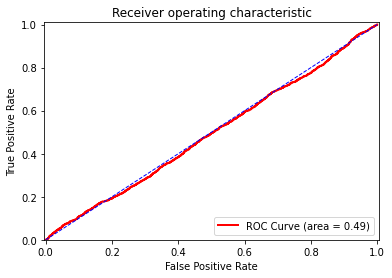

In [25]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

###Testing Logistic Regression with Morey Feature Set(Adrian/Jesus)

In [26]:

label_logi = data_frame['shot_made_flag']
#setting the values for X & y
X_logistic = feature_cols
y_logistic = label_logi
X_logistic.head()

my_logreg = LogisticRegression(max_iter=2000)
#random state can be deleted
Logis_X_train, Logis_X_test, Logis_y_train, Logis_y_test = train_test_split(X_logistic, y_logistic, test_size=0.25, random_state=2)
my_logreg.fit(Logis_X_train, Logis_y_train)
y_predict_lr = my_logreg.predict(Logis_X_test)
#accuracy score for Logistic Regression
score_lr = accuracy_score(Logis_y_test, y_predict_lr)


print("Accuracy for Logistic Regression:")
print(score_lr)

Accuracy for Logistic Regression:
0.6779766536964981


####Cross Validation for Logistic Regression For Morey Set (Adrian/Jesus)

In [27]:
from sklearn.model_selection import cross_val_score

morey_logreg = LogisticRegression(max_iter=2000)
Logis_accuracy_list = cross_val_score(morey_logreg, X_logistic, y_logistic, cv=10, 
                                scoring='accuracy')
print(Logis_accuracy_list)
# use average of accuracy values as final result
Logis_accuracy_cv = Logis_accuracy_list.mean()
print("Logistic RegressionAverage Accuracy:")
print(Logis_accuracy_cv)

[0.69066148 0.68793774 0.68793774 0.69143969 0.68832685 0.67898833
 0.65836576 0.6687427  0.6866485  0.67302452]
Logistic RegressionAverage Accuracy:
0.6812073313512047


In [28]:
from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(Logis_y_test, y_predict_lr)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Square Error")
print(rmse)
print("LOWER IS BETTER")

Root Mean Square Error
0.5674710092185343
LOWER IS BETTER


####Estimating Probability (Adrian/Jesus)

In [29]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(Logis_X_test)

# This line prints the "actual label" of the testing set:
print(Logis_y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
print("Likely hood of shot missed/shot made",y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print("Likelyhood Kobe made the shot: ", y_predict_prob_lr[:,1])


21499    0.0
3792     0.0
11940    1.0
18049    0.0
21683    0.0
        ... 
27929    1.0
11135    0.0
3778     1.0
23910    1.0
4456     1.0
Name: shot_made_flag, Length: 6425, dtype: float64
[0. 0. 0. ... 0. 1. 0.]
Likely hood of shot missed/shot made [[0.68468227 0.31531773]
 [0.69237343 0.30762657]
 [0.64087016 0.35912984]
 ...
 [0.643617   0.356383  ]
 [0.0238674  0.9761326 ]
 [0.70422683 0.29577317]]
Likelyhood Kobe made the shot:  [0.31531773 0.30762657 0.35912984 ... 0.356383   0.9761326  0.29577317]


####Model Evaluation and Visualization(Adrian/Jesus)

#####True Postive Rate

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(Logis_y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.00000000e+00 2.82485876e-04 2.82485876e-04 2.82485876e-04
 8.47457627e-04 8.47457627e-04 8.47457627e-04 8.47457627e-04
 8.47457627e-04 8.47457627e-04 8.47457627e-04 1.41242938e-03
 1.41242938e-03 1.69491525e-03 1.97740113e-03 1.97740113e-03
 2.54237288e-03 2.54237288e-03 2.54237288e-03 2.82485876e-03
 2.82485876e-03 3.67231638e-03 3.67231638e-03 3.95480226e-03
 3.95480226e-03 4.80225989e-03 5.36723164e-03 5.36723164e-03
 5.36723164e-03 5.64971751e-03 5.64971751e-03 5.64971751e-03
 6.21468927e-03 6.21468927e-03 6.21468927e-03 6.21468927e-03
 6.21468927e-03 6.49717514e-03 6.49717514e-03 6.49717514e-03
 7.06214689e-03 7.06214689e-03 7.62711864e-03 7.62711864e-03
 7.62711864e-03 7.90960452e-03 8.19209040e-03 8.19209040e-03
 8.75706215e-03 8.75706215e-03 9.32203390e-03 9.60451977e-03
 9.88700565e-03 9.88700565e-03 1.01694915e-02 1.04519774e-02
 1.41242938e-02 1.41242938e-02 1.41242938e-02 1.44067797e-02
 1.44067797e-02 1.44067797e-02 1.46892655e-02 1.46892655e-02
 1.46892655e-02 1.468926

#####AUC


In [31]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.6886371158045217


#####**ROC CURVE**


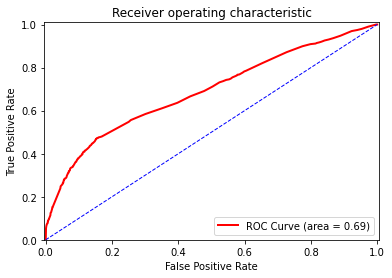

In [32]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# **Linear Regression**
Jesus Made this attempt

In [33]:
from sklearn.linear_model import LinearRegression

combined_shot_type_mod = pd.get_dummies(data_frame.combined_shot_type, prefix='combined_shot_type')
shot_type_mod = pd.get_dummies(data_frame.shot_type, prefix='shot_type')

shot_zone_basic_mod = pd.get_dummies(data_frame.shot_zone_basic, prefix='shot_zone_basic')

features_linear = data_frame[['game_event_id','game_id','lat','loc_x','loc_y',
                 'lon','minutes_remaining','period','playoffs',
                 'seconds_remaining','shot_distance', 'shot_id']]
label_logi = data_frame['shot_made_flag']
#included in concat: action_type, opponent, combined_shot_type,
#not included: matchup,game_date, team_name,team_id,season
modified_features = pd.concat([features_linear, action_type_mod, 
                               shot_zone_range_mod,opponent_mod,
                               shot_zone_area_mod,shot_type_mod], axis=1, sort=False)

In [34]:
X= modified_features
X.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_id,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Finger Roll Shot,action_type_Driving Floating Bank Jump Shot,action_type_Driving Floating Jump Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,action_type_Fadeaway Bank shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Layup Shot,action_type_Finger Roll Shot,action_type_Floating Jump shot,action_type_Follow Up Dunk Shot,action_type_Hook Bank Shot,action_type_Hook Shot,action_type_Jump Bank Shot,action_type_Jump Hook Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Pullup Bank shot,...,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NJN,opponent_NOH,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS,shot_zone_area_Back Court(BC),shot_zone_area_Center(C),shot_zone_area_Left Side Center(LC),shot_zone_area_Left Side(L),shot_zone_area_Right Side Center(RC),shot_zone_area_Right Side(R),shot_type_2PT Field Goal,shot_type_3PT Field Goal
1,12,20000012,34.0443,-157,0,-118.4268,10,1,0,22,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,35,20000012,33.9093,-101,135,-118.3708,7,1,0,45,16,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,43,20000012,33.8693,138,175,-118.1318,6,1,0,52,22,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,155,20000012,34.0443,0,0,-118.2698,6,2,0,19,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,32,14,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [35]:
y=data_frame['shot_made_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=2)



In [36]:
my_linreg = LinearRegression()

# fitting the model to the training data:
my_linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# make predictions on the testing set
y_predict_lin = my_linreg.predict(X_test)

print(y_predict_lin)

[0.28561283 0.28188603 0.37592653 ... 0.39052064 0.93702233 0.29399329]


In [38]:
from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_lin)

rmse = np.sqrt(mse)

print(rmse)

0.4614916209044389


##Linear Regression using 10-fold cross validation

In [39]:
my_linreg2 = LinearRegression()
from sklearn.model_selection import cross_val_score
mse_list = cross_val_score(my_linreg2, X, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)

mse_list_positive = -mse_list

rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)


[-0.21229226 -0.20836732 -0.21065101 -0.21098973 -0.20993971 -0.21812525
 -0.2158115  -0.21231176 -0.21172506 -0.21350314]
[0.46075184 0.4564727  0.45896733 0.45933618 0.45819179 0.46703881
 0.46455516 0.460773   0.46013592 0.462064  ]


In [40]:
print("Root Mean Square Error")
print(rmse_list.mean())




Root Mean Square Error
0.46082867337459116


##Linear Regression using Morey Set

In [41]:
from sklearn import preprocessing
label_linear = data_frame['shot_made_flag']
#setting the values for X & y
X_linear = feature_cols
y_linear = label_linear
normalize_X = preprocessing.normalize(X_linear)
X_train2, X_test_morey, y_train2, y_test_morey = train_test_split(normalize_X, y_linear, test_size=0.25, 
                                                    random_state=2)

my_linreg_morey = LinearRegression()

# fitting the model to the training data:
my_linreg_morey.fit(X_train2, y_train2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# make predictions on the testing set
y_predict_lin_morey = my_linreg_morey.predict(X_test_morey)

print(y_predict_lin_morey)

[0.32991607 0.35168338 0.37411702 ... 0.37900659 0.98249349 0.32943335]


In [43]:
from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test_morey, y_predict_lin_morey)

rmse = np.sqrt(mse)

print(rmse)



3997919.446871378


##Linear Regression using 10 fold cross validation

In [44]:
my_linreg_morey2 = LinearRegression()
from sklearn.model_selection import cross_val_score
mse_list = cross_val_score(my_linreg_morey2, X_linear, y_linear, cv=10, scoring='neg_mean_squared_error')

print(mse_list)

mse_list_positive = -mse_list

rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)


print("Root Mean Square Error")
print(rmse_list.mean())

[-2.11407123e-01 -2.08458563e-01 -9.96861921e+13 -9.68402878e+13
 -2.10967142e-01 -2.17430079e-01 -2.16919409e-01 -4.82278544e+16
 -2.11478424e-01 -2.14864737e-01]
[4.59790303e-01 4.56572626e-01 9.98429728e+06 9.84074630e+06
 4.59311596e-01 4.66293984e-01 4.65746077e-01 2.19608411e+08
 4.59867833e-01 4.63535044e-01]
Root Mean Square Error
23943345.82913602


#KNN (Expanded Morey Feature Set). (Adrian/Jesus)
Added loc_x, loc_y

In [45]:
#get the features from Data
features2 = data_frame[['shot_distance']]
#feature_cols = ['shot_zone_basic_mod','shot_zone_range','action_type_mod','combined_shot_type_mod'] shot_zone_area
shot_zone_basic_mod = pd.get_dummies(data_frame.shot_zone_basic, prefix='shot_zone_basic')
explanded_feature_cols = pd.concat([features2, shot_zone_basic_mod, shot_zone_range_mod, action_type_mod, combined_shot_type_mod, shot_type_mod], axis=1, sort=False)



#find out what values to use for test_size and random_state
feature_train, feature_test, label_train, label_test = train_test_split(explanded_feature_cols, labels, test_size=0.25, random_state=6)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(feature_train, label_train)
label_predict = knn.predict(feature_test)

knn_accuracy = accuracy_score(label_test, label_predict)
print(f'KNN accuracy at k=10: {knn_accuracy}')




KNN accuracy at k=10: 0.643579766536965
